In [8]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
import numpy as np 
from sklearn.model_selection import cross_validate 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, matthews_corrcoef
 
import warnings 
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier

In [9]:
traindata = pd.read_excel('F:/Amino acid-classifier/classifier/data/training_set_20aa.xlsx')
X = traindata[['mean', 'std', 'skew', 'kurt', 'toff']]
y = traindata['label']

X = np.array(X)
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)

In [10]:
testdata = pd.read_excel('F:/Amino acid-classifier/classifier/data/testing_set_20aa.xlsx')
test_X = testdata.iloc[:, 0:5]
test_X = StandardScaler().fit_transform(test_X)
target = LabelEncoder().fit_transform(testdata['label'])

In [11]:
model = CatBoostClassifier(depth=6,
                          learning_rate=0.1)

In [12]:
scc = ['accuracy', 'precision', 'recall', 'f1','roc_auc']
result = cross_validate(model, X, y, scoring=scc, cv=10)

0:	learn: 2.3205783	total: 16.9ms	remaining: 16.9s
1:	learn: 1.9854157	total: 31.8ms	remaining: 15.9s
2:	learn: 1.7314823	total: 45.6ms	remaining: 15.2s
3:	learn: 1.5237117	total: 59.8ms	remaining: 14.9s
4:	learn: 1.3607491	total: 74.4ms	remaining: 14.8s
5:	learn: 1.2324777	total: 88.4ms	remaining: 14.6s
6:	learn: 1.1500655	total: 105ms	remaining: 14.9s
7:	learn: 1.0781618	total: 119ms	remaining: 14.8s
8:	learn: 0.9906796	total: 133ms	remaining: 14.7s
9:	learn: 0.9097057	total: 148ms	remaining: 14.6s
10:	learn: 0.8373702	total: 162ms	remaining: 14.6s
11:	learn: 0.7916104	total: 176ms	remaining: 14.5s
12:	learn: 0.7343161	total: 191ms	remaining: 14.5s
13:	learn: 0.6821531	total: 205ms	remaining: 14.5s
14:	learn: 0.6351137	total: 220ms	remaining: 14.5s
15:	learn: 0.5938435	total: 235ms	remaining: 14.5s
16:	learn: 0.5633772	total: 251ms	remaining: 14.5s
17:	learn: 0.5372142	total: 267ms	remaining: 14.6s
18:	learn: 0.5118426	total: 282ms	remaining: 14.5s
19:	learn: 0.4891579	total: 296ms	r

In [13]:
result['test_accuracy'].mean()

0.9881250000000001

In [14]:
model.fit(X, y)
y_test = model.predict(test_X)

0:	learn: 2.2926211	total: 17.8ms	remaining: 17.8s
1:	learn: 1.9353445	total: 32.7ms	remaining: 16.3s
2:	learn: 1.6892939	total: 47.2ms	remaining: 15.7s
3:	learn: 1.4893949	total: 62.2ms	remaining: 15.5s
4:	learn: 1.3397193	total: 77ms	remaining: 15.3s
5:	learn: 1.2132717	total: 92ms	remaining: 15.2s
6:	learn: 1.1150664	total: 108ms	remaining: 15.4s
7:	learn: 1.0443499	total: 127ms	remaining: 15.7s
8:	learn: 0.9733213	total: 143ms	remaining: 15.8s
9:	learn: 0.8972750	total: 158ms	remaining: 15.7s
10:	learn: 0.8442095	total: 174ms	remaining: 15.6s
11:	learn: 0.7824109	total: 188ms	remaining: 15.5s
12:	learn: 0.7378693	total: 202ms	remaining: 15.4s
13:	learn: 0.7073368	total: 218ms	remaining: 15.3s
14:	learn: 0.6747921	total: 233ms	remaining: 15.3s
15:	learn: 0.6328233	total: 251ms	remaining: 15.4s
16:	learn: 0.5971459	total: 265ms	remaining: 15.3s
17:	learn: 0.5645746	total: 280ms	remaining: 15.3s
18:	learn: 0.5342560	total: 295ms	remaining: 15.3s
19:	learn: 0.5104531	total: 310ms	remai

In [15]:
probs = model.predict_proba(test_X)
roc_auc = roc_auc_score(target, probs, multi_class="ovr")
roc_auc

0.9995986842105264

In [16]:
precision = precision_score(target, y_test, average='macro') 
recall = recall_score(target, y_test, average='macro')
f1 = f1_score(target, y_test, average='macro')
mcc = matthews_corrcoef(target, y_test)

print('f1_score is:', f1)
print('recall score is:', recall)
print('precision is:', precision)
print('mcc is:', mcc)

f1_score is: 0.9737406433468625
recall score is: 0.9733333333333333
precision is: 0.9764302943846603
mcc is: 0.9720719507337742


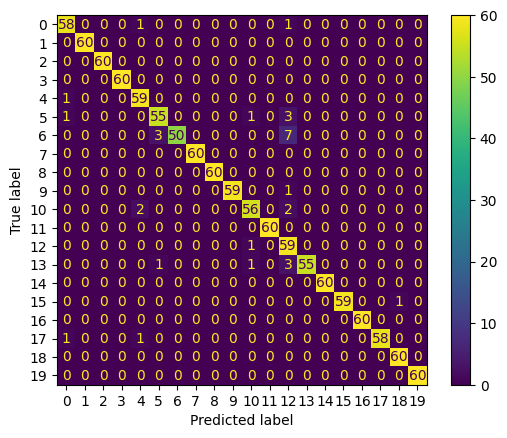

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(target, y_test)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot()